***
$\mathbf{\text{K-Nearest Neighbor Algorithm}}$<br>
***

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems.

KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.
KNN is also a non-parametric learning algorithm because it doesn’t make any assumptions about the underlying data.


k is the most important parameter in KNN algorithm as it checks the nearest neighbors from the data point to be classified as per the value given for k.

Choosing the right value of k is a process called parameter tuning and is important for better accuracy.

There is no structured method for finding the right value of k. One has to chose different values by trial and error method.

To find the nearest neighbors, we use the euclidean distance.

Steps:

<li> We will start with dataset with known categories. </li>
<li> Then we will add a new cell with unknown category. </li>
<li> We classify the new cell by looking at the nearest annotated cells(i.e. Nearest Neighbors). </li>
<li> The number of k we are going to choose will determine the new cell category as it will only look at the highest number of neighbors belonging to a specific category. </li>


The euclidean distance between two points A(X1, Y1) and B(X2, Y2) can be given as:
\begin{align}
Euclidean-distance = \sqrt{(X_{2} - X_{1})^{2} + (Y_{2} - Y_{1})^{2}}
\end{align}

We will first implement the KNN algorithm from scratch and then use it on the IRIS dataset to calculate the accuracy score

In [1]:
import numpy as np
from collections import Counter

In [2]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

In [3]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        y_pred = [self._predict(i) for i in X]
        return np.array(y_pred)
    
    def _predict(self, i):
        distance = [euclidean_distance(i, i_train) for i_train in self.X_train]
        k_indices = np.argsort(distance)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

#### Let us implement the above function to the IRIS dataset from sklearn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
iris = load_iris()

In [6]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
df.shape

(150, 5)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

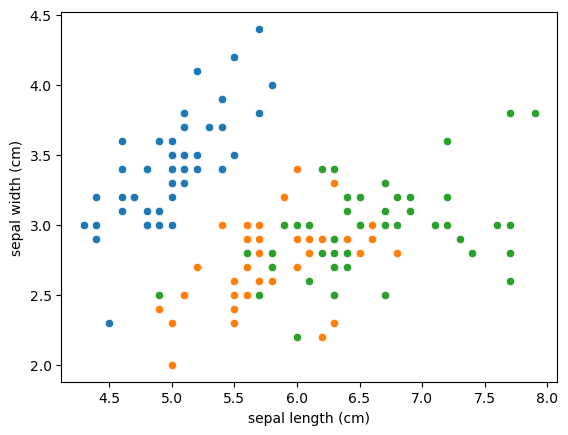

In [10]:
sns.scatterplot(x = df['sepal length (cm)'][:50], y = df['sepal width (cm)'][:50])
sns.scatterplot(x = df['sepal length (cm)'][51:100], y = df['sepal width (cm)'][51:100])
sns.scatterplot(x = df['sepal length (cm)'][101:150], y = df['sepal width (cm)'][10:150])

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

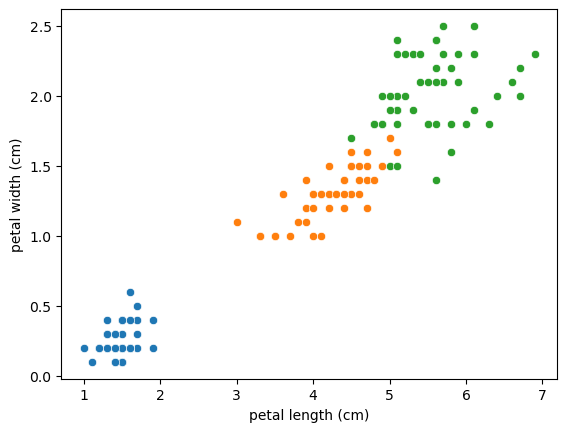

In [11]:
sns.scatterplot(x = df['petal length (cm)'][:50], y = df['petal width (cm)'][:50])
sns.scatterplot(x = df['petal length (cm)'][51:100], y = df['petal width (cm)'][51:100])
sns.scatterplot(x = df['petal length (cm)'][101:150], y = df['petal width (cm)'][10:150])

In [12]:
X, y = iris.data, iris.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [14]:
k=3

classifier = KNN(k=k)
classifier.fit(X_train, y_train)

In [15]:
pred = classifier.predict(X_test)

In [16]:
print("The accuracy score of our manual implementation is :", accuracy_score(y_test, pred))

The accuracy score of our manual implementation is : 0.9555555555555556


In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

C:\Users\Gaurav\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [18]:
print("The accuracy score of KNN through sklearn is :", accuracy_score(y_test, predictions))

The accuracy score of KNN through sklearn is : 0.9555555555555556
